In [82]:
from keras import applications, optimizers
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers.convolutional import Convolution2D
from keras import backend as K
import keras
import numpy as np
from keras.applications.imagenet_utils import preprocess_input
from img_loader import DatasetLoader
from keras.utils import np_utils
from keras.preprocessing import image
from keras.models import Model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageOps
from sklearn.preprocessing import MinMaxScaler
import scipy.misc
from PIL import ImageEnhance
import cv2
import matplotlib.pyplot as pp
from keras.models import load_model, save_model
import random
from numpy import argmax

In [83]:
%matplotlib inline
np.random.seed(123)  # for reproducibility
random.seed(123)

In [84]:
dl = DatasetLoader("/home/lux/dev/Bachelor-2017/keras/dataset", 400)
model = load_model("vgg16_ft_gap_cam_normal_v2.h5")
model.summary()

DATASET LOADER] Discovering dataset...
DATASET LOADER] 
38 classes found.
 54305 images found.
DATASET LOADER] Shuffling order...
DATASET LOADER] 
Ready for loading!
 40728 for training and 13576 for testing
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________


/usr/lib64/python3.5/site-packages/keras/models.py:281: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [ ]:
# Ok here the optimizer is not loaded but it's not important as we only want to do predictions. No more training.

In [67]:
i = 7

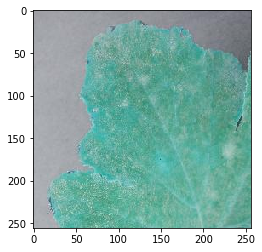

predict input's shape: (1, 256, 256, 3)


In [80]:
predict_input = cv2.imread(dl.baseDirectory + "/" + dl.imgDataArray[i].directory + "/" +
                                       dl.imgDataArray[i].name, cv2.IMREAD_COLOR)
plt.imshow(predict_input)
plt.show()
predict_input = predict_input.astype('float32')
predict_input = np.expand_dims(predict_input, axis=0)
print("predict input's shape:", predict_input.shape)
predict_input = preprocess_input(predict_input)

In [87]:
for d in dl.directories:
    print(d)

('Tomato___Target_Spot', 0)
('Pepper,_bell___Bacterial_spot', 1)
('Corn_(maize)___Northern_Leaf_Blight', 2)
('Strawberry___healthy', 3)
('Cherry_(including_sour)___Powdery_mildew', 4)
('Corn_(maize)___healthy', 5)
('Tomato___healthy', 6)
('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 7)
('Cherry_(including_sour)___healthy', 8)
('Peach___Bacterial_spot', 9)
('Blueberry___healthy', 10)
('Grape___Esca_(Black_Measles)', 11)
('Peach___healthy', 12)
('Tomato___Spider_mites Two-spotted_spider_mite', 13)
('Tomato___Tomato_Yellow_Leaf_Curl_Virus', 14)
('Tomato___Bacterial_spot', 15)
('Tomato___Early_blight', 16)
('Potato___healthy', 17)
('Pepper,_bell___healthy', 18)
('Squash___Powdery_mildew', 19)
('Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 20)
('Tomato___Leaf_Mold', 21)
('Apple___Black_rot', 22)
('Tomato___Tomato_mosaic_virus', 23)
('Apple___healthy', 24)
('Potato___Early_blight', 25)
('Strawberry___Leaf_scorch', 26)
('Soybean___healthy', 27)
('Grape___healthy', 28)
('Tomato___Sept

In [ ]:
('Apple___Cedar_apple_rust', 0)
('Potato___Late_blight', 1)
('Potato___Early_blight', 2)
('Apple___healthy', 3)
('Blueberry___healthy', 4)
('Soybean___healthy', 5)
('Strawberry___healthy', 6)
('Tomato___Target_Spot', 7)
('Orange___Haunglongbing_(Citrus_greening)', 8)
('Apple___Apple_scab', 9)
('Tomato___Septoria_leaf_spot', 10)
('Peach___Bacterial_spot', 11)
('Corn_(maize)___Common_rust_', 12)
('Tomato___Late_blight', 13)
('Tomato___Tomato_mosaic_virus', 14)
('Grape___healthy', 15)
('Corn_(maize)___Northern_Leaf_Blight', 16)
('Cherry_(including_sour)___Powdery_mildew', 17)
('Squash___Powdery_mildew', 18)
('Grape___Esca_(Black_Measles)', 19)
('Peach___healthy', 20)
('Grape___Black_rot', 21)
('Tomato___Early_blight', 22)
('Tomato___Leaf_Mold', 23)
('Potato___healthy', 24)
('Corn_(maize)___healthy', 25)
('Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 26)
('Raspberry___healthy', 27)
('Pepper,_bell___healthy', 28)
('Tomato___healthy', 29)
('Tomato___Tomato_Yellow_Leaf_Curl_Virus', 30)
('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 31)
('Strawberry___Leaf_scorch', 32)
('Pepper,_bell___Bacterial_spot', 33)
('Tomato___Spider_mites Two-spotted_spider_mite', 34)
('Tomato___Bacterial_spot', 35)
('Apple___Black_rot', 36)
('Cherry_(including_sour)___healthy', 37)


In [69]:
predict_input.shape

(1, 256, 256, 3)

In [70]:
predictions = model.predict(predict_input)
model.predict_classes(predict_input)

1/1 [==============================] - 1s


array([10])

In [71]:
predictions[0]

array([  6.77528372e-21,   6.36346116e-19,   4.12614847e-20,
         3.15343282e-21,   3.70420762e-26,   2.23638091e-23,
         2.10610701e-25,   1.00438859e-23,   1.98520224e-18,
         2.05241314e-24,   1.00000000e+00,   5.29565487e-20,
         1.27709730e-17,   1.20179437e-21,   4.28845939e-25,
         7.19678115e-13,   1.27410503e-24,   3.39229096e-20,
         5.24480089e-24,   5.86716624e-21,   1.26709734e-15,
         1.35595380e-21,   2.57386760e-19,   5.15081481e-14,
         1.21151587e-21,   5.00074981e-24,   2.70759338e-21,
         3.84303679e-17,   8.42829799e-24,   1.93338540e-20,
         1.73039820e-22,   5.41120751e-16,   2.58990381e-25,
         5.99399112e-20,   1.80800467e-23,   9.08605699e-23,
         9.20920394e-15,   3.81525729e-23], dtype=float32)

(38,)


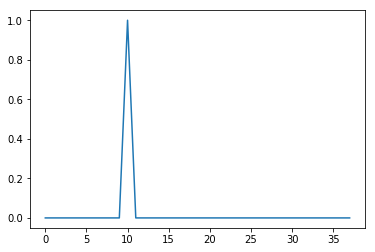

In [72]:
print(predictions[0].shape)
pp.plot(predictions[0])
pp.show()

In [73]:
# predicted class value
value = np.amax(predictions[0])
value

1.0

In [74]:
# predicted class is 
print("predicted shample name = ", dl.imgDataArray[i].name)
print("predicted shample's class = ", dl.imgDataArray[i].img_class)
print("predicted shample's directory = ", dl.imgDataArray[i].directory)
np.where(predictions[0]==value)

predicted shample name =  fc11d912-964a-4467-88bd-a92e47c56765___UF.GRC_YLCV_Lab 02284.JPG
predicted shample's class =  14
predicted shample's directory =  Tomato___Tomato_Yellow_Leaf_Curl_Virus


(array([10]),)

In [75]:
print(argmax(predictions))

10


In [78]:
s = 0
ts = 0
for i in range(dl.number_of_imgs_for_test, dl.number_of_imgs_for_test+600):
    predict_input = cv2.imread(dl.baseDirectory + "/" + dl.imgDataArray[i].directory + "/" +
                                       dl.imgDataArray[i].name, cv2.IMREAD_COLOR)
    predict_input = predict_input.astype('float32')
    predict_input = np.expand_dims(predict_input, axis=0)
    predict_input = preprocess_input(predict_input)
    predictions = model.predict(predict_input)
    value = argmax(predictions)
    if(value == dl.imgDataArray[i].img_class):
        s += 1
    else:
        print("Value mismatch-> expected", dl.imgDataArray[i].img_class, "but got", value)
    ts += 1
print("s", s, "TS", ts)

13576 / 14176
13577 / 14176
13578 / 14176
13579 / 14176
13580 / 14176
13581 / 14176
13582 / 14176
13583 / 14176
13584 / 14176
13585 / 14176
13586 / 14176
13587 / 14176
13588 / 14176
13589 / 14176
13590 / 14176
13591 / 14176
13592 / 14176
13593 / 14176
13594 / 14176
13595 / 14176
13596 / 14176
13597 / 14176
13598 / 14176
13599 / 14176
13600 / 14176
13601 / 14176
13602 / 14176
13603 / 14176
13604 / 14176
13605 / 14176
13606 / 14176
13607 / 14176
13608 / 14176
13609 / 14176
13610 / 14176
13611 / 14176
13612 / 14176
13613 / 14176
13614 / 14176
13615 / 14176
13616 / 14176
13617 / 14176
13618 / 14176
13619 / 14176
13620 / 14176
13621 / 14176
13622 / 14176
13623 / 14176
13624 / 14176
13625 / 14176
13626 / 14176
13627 / 14176
13628 / 14176
13629 / 14176
13630 / 14176
13631 / 14176
13632 / 14176
13633 / 14176
13634 / 14176
13635 / 14176
13636 / 14176
13637 / 14176
13638 / 14176
13639 / 14176
13640 / 14176
13641 / 14176
13642 / 14176
13643 / 14176
13644 / 14176
13645 / 14176
13646 / 14176
13647 

In [86]:
s = 0
ts = 0
for i in range(dl.number_of_imgs_for_test, dl.number_of_imgs_for_test+600):
    predict_input = cv2.imread(dl.baseDirectory + "/" + dl.imgDataArray[i].directory + "/" +
                                       dl.imgDataArray[i].name, cv2.IMREAD_COLOR)
    predict_input = np.expand_dims(predict_input, axis=0)
    predict_input = predict_input.astype('float32')
    predict_input = preprocess_input(predict_input)
    predictions = model.predict(predict_input)
    value = argmax(predictions)
    if(value == dl.imgDataArray[i].img_class):
        s += 1
    else:
        print("Value mismatch-> expected", dl.imgDataArray[i].img_class, "but got", value)
    ts += 1
print("s", s, "TS", ts)

Value mismatch-> expected 2 but got 35
Value mismatch-> expected 27 but got 28
Value mismatch-> expected 34 but got 11
Value mismatch-> expected 14 but got 10
Value mismatch-> expected 9 but got 32
Value mismatch-> expected 32 but got 9
Value mismatch-> expected 15 but got 20
Value mismatch-> expected 15 but got 20
Value mismatch-> expected 34 but got 11
Value mismatch-> expected 2 but got 35


KeyboardInterrupt: 